## Changepoint detection 

#### Scenario 2: Linear Drift

Reference:
NIST CUSUM example is at: https://www.itl.nist.gov/div898/handbook/pmc/section3/pmc323.htm

In [1]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pandas as pd
import dataframe_image as dfi

sns.set_style('darkgrid')
np.random.seed(42)
#

The data for CUSUM-based changepoint detection is the AUC scores which are the outcome of the MLP classifier. The classifier was first tained using data samples from one distribution (in-control) which has a classificatoin AUC of 0.86. The model was then tested with the test data drawn from the same distribution. The model was also tested with data samples drawn from another distribution (out-of-control) with classification AUC 0.80.

To simulate the linear (gradual) drift scenario, the trained model is first tested with the random samples drawn from the in-control distribution each day for 100 days (day0-99) followed by random samples drawn from the out-of-control distribution for the next 100 days (day 100-199).

As a first step, load the data followed by train the classifier with the in-control data.

In [2]:
# Load Data - AUC 0.86 and  AUC 0.80
data86 = np.load('d0-AUC.86.npy')   #in-control  #d0-AUC.86-35k.npy
data85 = np.load('d0-AUC.850.npy')  #out-of-control 
data84 = np.load('d0-AUC.840.npy')  #out-of-control 
data83 = np.load('d0-AUC.8302.npy') #out-of-control 
data82 = np.load('d0-AUC.820.npy')  #out-of-control 
data81 = np.load('d0-AUC.810.npy')  #out-of-control 
data80 = np.load('d5-AUC.80.npy')   #out-of-control
#print(data86.shape)
#print(data80.shape)

In [3]:
import sklearn
#print(samples.shape)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('always') 
warnings.filterwarnings('ignore')

#--------------------------------------------------------
# Train Classifier - MLP
#--------------------------------------------------------
samples = data86[:,[0,1]]
labels = data86[:,2]


X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.20, random_state=5)
print("Train",X_train.shape)
print("Test",X_test.shape)

mlp = MLPClassifier(hidden_layer_sizes=(2,4,4,1), activation='relu', solver='adam', max_iter=2000,learning_rate_init=0.001,learning_rate="constant",random_state=4,shuffle=True,batch_size=8)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
#predict_test = mlp.predict(X_test)

#Evaluate the Model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

tn, fp, fn, tp = confusion_matrix(y_train,predict_train).ravel()
specificity = tn / (tn+fp)

AUC = roc_auc_score(y_train,predict_train)
print("Specificity:", specificity)
print("AUC:", AUC)
#print(predict_train.shape)

Train (16800, 2)
Test (4200, 2)
[[5910 1308]
 [ 881 8701]]
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      7218
         1.0       0.87      0.91      0.89      9582

    accuracy                           0.87     16800
   macro avg       0.87      0.86      0.87     16800
weighted avg       0.87      0.87      0.87     16800

Specificity: 0.8187863674147964
AUC: 0.863421570265528


Split the out-of-control data into train/test set and draw samples from the test set for simulating the sudden drift scenario

In [4]:
# Samples from the second distribution -  (day100-101)
samples85 = data85[:,[0,1]]
labels85  = data85[:,2]

X_train85, X_test85, y_train85, y_test85 = train_test_split(samples85, labels85, test_size=0.20, random_state=3)

# Samples from the third distribution -  (day102-103)
samples84 = data84[:,[0,1]]
labels84  = data84[:,2]

X_train84, X_test84, y_train84, y_test84 = train_test_split(samples84, labels84, test_size=0.20, random_state=3)

# Samples from the fourth distribution -  (day104-105)
samples83 = data83[:,[0,1]]
labels83  = data83[:,2]

X_train83, X_test83, y_train83, y_test83 = train_test_split(samples83, labels83, test_size=0.20, random_state=3)

# Samples from the fifth distribution -  (day106-107)
samples82 = data82[:,[0,1]]
labels82  = data82[:,2]

X_train82, X_test82, y_train82, y_test82 = train_test_split(samples82, labels82, test_size=0.20, random_state=3)

# Samples from the sixth distribution -  (day108-109)
samples81 = data81[:,[0,1]]
labels81  = data81[:,2]

X_train81, X_test81, y_train81, y_test81 = train_test_split(samples81, labels81, test_size=0.20, random_state=3)

# Samples from the final distribution -  (day110-199)
samples80 = data80[:,[0,1]]
labels80  = data80[:,2]

X_train80, X_test80, y_train80, y_test80 = train_test_split(samples80, labels80, test_size=0.20, random_state=3)

#-------------------------------------------------------------------
#Check the test AUC of the above datasets 
#-------------------------------------------------------------------
#predict_test_80 = mlp.predict(X_test80)

# Performance on test data
#-------------------------------------------------------------------

#print the confusion matrix and the confusion report results on the test data
#print(confusion_matrix(y_test80,predict_test_80))
#print(classification_report(y_test80,predict_test_80))
#tn, fp, fn, tp = confusion_matrix(y_test80,predict_test_80).ravel()
#specificity = tn / (tn+fp)


#AUC = roc_auc_score(y_test80,predict_test_80)
#print("Test: Specificity:", specificity)
#print("Test: AUC:", AUC)

##### Linear Drift 
Run 1000 simulations of:
 - Day 0-99 &emsp;&nbsp;&nbsp; -  AUC 0.86 &nbsp;(in-control data)
 - Day 100-101 – AUC 0.85 
 - Day 102-103 – AUC 0.84
 - Day 104-105 – AUC 0.83
 - Day 106-107 – AUC 0.82
 - Day 108-109 – AUC 0.81
 - Day 110-199 – AUC 0.80

Save the test AUCs for the changepoint detection using CUSUM algorithm.

###### Evaluate:
#False Positives, #True Positives, #False Negatives, average, minimum and maximum delay to detect the change point. Each experiment either has multiple FPs and one TP (or missed detection -> False Negatives). Once all the FPs and one TP is detected, break out of the loop. Mean Time Between False Alarms is computed in the pre-change regime and Average Detection Delay in the post-change regime.

In [5]:
# Simulate 1000 experiments of Linear (gradual) drift
runs = 0
FalsePos      =  np.array([])
TruePos       =  np.array([])
DelaytoDetect =  np.array([])
FAR           =  np.array([])     #False Alarm Rate
STD_test_AUCs =  np.array([])     #Standard deviation of test AUCs
#DetectionTimes=  np.array([])
DetectionTimes=  np.array([],dtype=int)
AvgDD         = np.array([])       # Average Detection Delay
while (runs < 1000):
    test_days = 0
    test_AUC =  np.array([])
    while (test_days < 100):     #day0-99 from AUC(0.86)
        test_samples = np.array([])
        test_labels = np.array([])
    

        number_of_rows = X_test.shape[0]
        random_indices = np.random.choice(number_of_rows, 
                                  size=50, 
                                  replace=False)
    
    
        test_samples = X_test[random_indices,:]
        test_labels  = y_test[random_indices]
        
        predict_test = mlp.predict(test_samples)

        #print(confusion_matrix(test_labels,predict_test))
        #print(classification_report(test_labels,predict_test))
        #tn, fp, fn, tp = confusion_matrix(test_labels,predict_test).ravel()
        #specificity = tn / (tn+fp)


        AUC = roc_auc_score(test_labels,predict_test)
        #print("Specificity:", specificity)
        #print("AUC:", AUC)

        test_AUC = np.append(test_AUC, AUC)
        #print("day",test_days)
        #AUC
        test_days += 1
    
    while (test_days < 105):    #day100-104 -  AUC(0.85)
        test_samples85 = np.array([])
        test_labels85 = np.array([])
    
        number_of_rows85 = X_test85.shape[0]
        random_indices85 = np.random.choice(number_of_rows85, 
                                  size=50, 
                                  replace=False)
    
        test_samples85 = X_test85[random_indices85,:]
        test_labels85  = y_test85[random_indices85]
        #test_samples.shape
        #print(y_test.shape)
        #test_labels

        predict_test85 = mlp.predict(test_samples85)
        AUC85 = roc_auc_score(test_labels85,predict_test85)
        test_AUC = np.append(test_AUC, AUC85)
        test_days += 1
     
    while (test_days < 110):    #day105-109 -  AUC(0.84)
        test_samples84 = np.array([])
        test_labels84 = np.array([])
    
        number_of_rows84 = X_test84.shape[0]
        random_indices84 = np.random.choice(number_of_rows84, 
                                  size=50, 
                                  replace=False)
    
        test_samples84 = X_test84[random_indices84,:]
        test_labels84  = y_test84[random_indices84]
        #test_samples.shape
        #print(y_test.shape)
        #test_labels

        predict_test84 = mlp.predict(test_samples84)
        AUC84 = roc_auc_score(test_labels84,predict_test84)
        test_AUC = np.append(test_AUC, AUC84)
        test_days += 1
        
    while (test_days < 200):    #day110-199 -  AUC(0.83)
        test_samples83 = np.array([])
        test_labels83 = np.array([])
    
        number_of_rows83 = X_test83.shape[0]
        random_indices83 = np.random.choice(number_of_rows83, 
                                  size=50, 
                                  replace=False)
    
        test_samples83 = X_test83[random_indices83,:]
        test_labels83  = y_test83[random_indices83]
        #test_samples.shape
        #print(y_test.shape)
        #test_labels

        predict_test83 = mlp.predict(test_samples83)
        AUC83 = roc_auc_score(test_labels83,predict_test83)
        test_AUC = np.append(test_AUC, AUC83)
        test_days += 1    
    
    
    #CUSUM for day0-200: outcomes are detection delay and #FP, #TP
    num_rows        = np.shape(test_AUC)[0]
    in_control_auc  = test_AUC[:100]
    out_control_auc = test_AUC[100:200]
    std_auc         = np.std(out_control_auc)
    x               = np.array(test_AUC)

    mu              = np.mean(in_control_auc)
    mu_1            = np.mean(out_control_auc)
    std             = np.std(in_control_auc)
    std_1           = np.std(out_control_auc)
    threshold       = 0.25    # Upper/lower control limit to detect the changepoint
    k               = 0.05    # Drift 0.05 is the 1 sigma change we wish to detect, 0.03 - half-sigma change
    
    x_mean = np.zeros(num_rows,dtype=float)
    #S_hi : for positive changes --------------------------
    S_hi = np.zeros(num_rows,dtype=float)
    S_hi[0] = 0.0 # starts with 0
    #Increase in mean = x-mu-k ----------------------------
    mean_hi = np.zeros(num_rows,dtype=float)

    #Decrease in mean = mu-k-x----------------------------
    mean_lo = np.zeros(num_rows,dtype=float)
    #S_lo : for negative changes --------------------------
    S_lo = np.zeros(num_rows,dtype=float)
    S_lo[0] = 0.0 # starts with 0
     #CUSUM: Cumulative sum of x minus mu ------------------
    cusum = np.zeros(num_rows,dtype=float)
    cusum[0] = 0.0 # initialize with 0
    
    for i in range(0, num_rows):
        x_mean[i]  = x[i] - mu  #x_mean 
        mean_hi[i] = x[i] - mu - k
        S_hi[i]    = max(0, S_hi[i-1] + mean_hi[i])
        mean_lo[i] = mu - k - x[i]
        S_lo[i]    = max(0, S_lo[i-1] + mean_lo[i])
        cusum[i]   = cusum[i-1] + x_mean[i]

    x_mean  = np.round(x_mean,decimals=2)
    S_hi    = np.round(S_hi,decimals=2)
    mean_lo = np.round(mean_lo,decimals=2)
    S_lo    = np.round(S_lo,decimals=2)
    cusum   = np.round(cusum,decimals=2)

    # Construct the tabular CUSUM Chart
    chart = np.array([])
    chart = np.column_stack((x.T, x_mean.T, mean_hi.T, S_hi.T, mean_lo.T, S_lo.T, cusum.T))
    np.round(chart, 2)

    #d = 2 *(np.log((1-0.01) / (0.0027)))
    #h = d * 0.5 # h= d*k where k=0.5
    #h = 4 # as per the NIST doc on CUSUM

    np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format})
    #print("CUSUM Chart is:\n", np.round(chart,decimals=2))
    #x_mean

    df = pd.DataFrame(chart) 
    df.columns = ['X','x-mu','Increase in Mean', 'S_hi', 'Decrease-in-mean', 'S_lo', 'CUSUM']
    #filename = "file%d" %runs
    #df.to_csv(("CUSUM-out/file%d.csv" %runs), sep='\t')    
    
    
    
    # False positives and Total alarms
    falsePos = 0
    alarms   = 0
    delay    = 0
    avddd    = 0   # this is the delay from the paper: td-ts (z_k-v) where v is the changepoint and z_k is the time of detection
    #MTBFA    = 0
    
    
    for i in range(0, num_rows):
        if (S_lo[i] > threshold):   
            if (i<100):
                falsePos += 1  #False Positives 
                #print("time false alarm",i)
                DetectionTimes= np.append(DetectionTimes, i)   #time at which a false positive is detected
                #print("detection times",DetectionTimes)
                #print("detection times size",DetectionTimes.size)
            #break
        #if (S_lo[i] > h):   
            #if (i>100):  
                #alarms += 1        #True Positive: break after detecting one TP
                #delay   = i-100+1    # ts is 100 because the change starts at day100
                #avddd   = i-100
            #break

    # Delay to detect the first changepoint
    #delay = 0
    for i in range(0, num_rows):
           if (S_lo[i] > threshold) and (i>99):
                    alarms += 1        #True Positive: break after detecting one TP
                    delay  = i-100+1    # ts is 100 because the change starts at day100
                    avddd  = i-100
                    break
    
    #Calculate MTBFA(Mean time time between False Alarms)
    #MTBFA = np.mean(DetectionTimes)
    #FlaseAlarmRate = 1/MTBFA
    
    FalsePos      = np.append(FalsePos, falsePos)
    TruePos       = np.append(TruePos, alarms)
    DelaytoDetect = np.append(DelaytoDetect, delay)   # td-ts+1
    #FAR           = np.append(FAR, FlaseAlarmRate)
    #DetectionTimes= np.append(DetectionTimes, detectionTime)
    AvgDD         = np.append(AvgDD, avddd)   # ADD estimate from the paper
    STD_test_AUCs = np.append(STD_test_AUCs, std_auc)
    #print(falsePos)
    runs += 1  # continue until 1000 runs

Calculate the False Positives, True Positives, Average Detection Delay and False Positive Rate

In [38]:
print("total number of False Positives:",np.sum(FalsePos))
print("Total True Positives:",np.sum(TruePos))
print("Average Detection Delay",np.mean(AvgDD))
print("Minimum Delay",np.min(AvgDD))
print("Maximum Delay",np.max(AvgDD))
MTBFA = np.mean(DetectionTimes)
FlaseAlarmRate = 1/MTBFA
print("MTBFA", MTBFA)
print("Flase Alarm Rate", FlaseAlarmRate)
nonZeroAvgDD = AvgDD[np.nonzero(AvgDD)]
#print("Average Detection Delay, ADD from paper is",np.mean(nonZeroAvgDD))
print("standard deviations of the test AUCs is",np.mean(STD_test_AUCs))

total number of False Positives: 0.0
Total True Positives: 545.0
Average Detection Delay 26.649
Minimum Delay 0.0
Maximum Delay 99.0
MTBFA nan
Flase Alarm Rate nan
standard deviations of the test AUCs is 0.05345832516560698


#### Comput the Average Run Length

In [21]:
import math
#DetectionTimes
std
out_control_auc = test_AUC[100:200]
mu_1=np.mean(out_control_auc)
k=(mu_1-mu)/2
delta_star=(mu_1-mu)/std
delta_star
upper_delta_minus = (-delta_star-k)
upper_delta_plus = (delta_star-k)
10+1.166
-1.58+0.03
ARL_plus = (math.exp(2*upper_delta_plus*5.166) + (2*-upper_delta_plus*5.166) - 1 )/(2*pow(upper_delta_plus,2))
#ARL_plus
ARL_minus = (math.exp(-2*upper_delta_minus*5.166) + (2*upper_delta_minus*5.166) - 1 )/(2*pow(upper_delta_minus,2))
#ARL_minus
ARL = pow((1/ARL_plus + 1/ARL_minus),-1)
ARL
FAR = 1/ARL
#FAR
print("ARL+",ARL_plus)
print("ARL-",ARL_minus)
print("ARL", ARL)
print("FAR", FAR)
print("k:", k)
print("delta_star: ", delta_star)
print("upper_delta_minus", upper_delta_minus)
print("upper_delta_plus",upper_delta_plus)
(0.80-0.86)/std

ARL+ 8.055062968642622
ARL- 7.741010102524087
ARL 3.947457291176273
FAR 0.25332762997469127
k: -0.013581898595619979
delta_star:  -0.5368177715307004
upper_delta_minus 0.5503996701263204
upper_delta_plus -0.5232358729350804


-1.1857350452546114

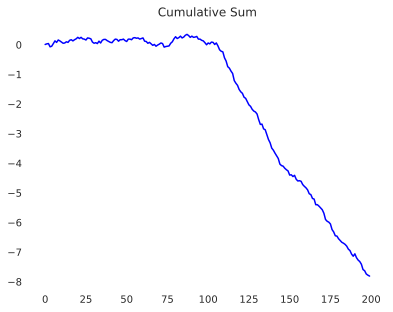

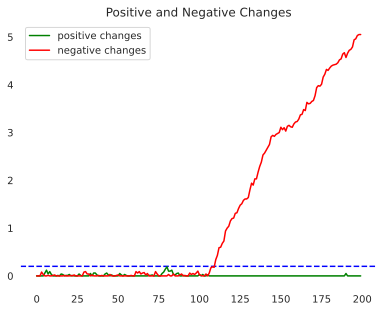

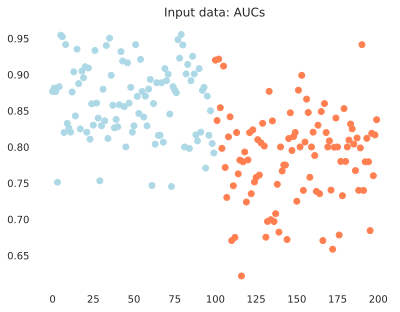

In [24]:
#CUSUM
plt.plot(cusum, '-b')
plt.title('Cumulative Sum')
plt.show()

# specifying horizontal line type
plt.axhline(y = 0.2, color = 'b', linestyle = '--')
plt.plot(S_hi,  '-g', label='positive changes')
plt.plot(S_lo, '-r', label='negative changes')
plt.title('Positive and Negative Changes')
plt.legend()
plt.show()

#Plot the AUCs
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(b=None)
y1 = np.arange(100)
x1 = test_AUC[:100]
plt.scatter(y1, x1, c='lightblue')
y2 = np.arange(100, 200, 1)
x2 = test_AUC[100:200]
plt.scatter(y2, x2, c='coral')
#plt.hlines(y = 0.86, xmin=0, xmax=99,color = 'lightblue', linestyle = '--')
#plt.hlines(y = 0.83, xmin=100, xmax=199,color = 'coral', linestyle = '--')
# single vline with specific ymin and ymax
#plt.vlines(x=100, ymin=0.83, ymax=0.86, colors='lightblue', linestyle = '--')
#yline(0.86)
#plt.plot(test_AUC, 'go')


plt.title('Input data: AUCs')
plt.show()